In [1]:
import pandas as pd
import numpy as np

C:\Users\denis\AppData\Local\Temp\ipykernel_34440\2937650959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
tips = pd.read_csv('tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
tips.dtypes

total_bill    float64
tip           float64
smoker         object
day            object
time           object
size            int64
dtype: object

In [4]:
tips['day'] = tips['day'].astype("category")
tips['smoker'] = tips['smoker'].astype("category")
tips['time'] = tips['time'].astype("category")

tips['day'] = tips['day'].cat.set_categories(["Thur", "Fri", "Sat", "Sun"], ordered=True)
tips['smoker'] = tips['smoker'].cat.set_categories(["No", "Yes"], ordered=True)
tips['time'] = tips['time'].cat.set_categories(["Lunch", "Dinner"], ordered=True)

In [5]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [6]:
tips['day'][10] < tips['day'][200]

True

In [7]:
print(tips['day'][10])
print(tips['day'][200])

Sun
Thur


In [8]:
tips['procentual_tip'] = tips['tip']/(tips['total_bill']+tips['tip'])*100
tips

,total_bill,tip,smoker,day,time,size,procentual_tip
0,16.99,1.01,No,Sun,Dinner,2,5.611111
1,10.34,1.66,No,Sun,Dinner,3,13.833333
2,21.01,3.50,No,Sun,Dinner,3,14.279886
3,23.68,3.31,No,Sun,Dinner,2,12.263801
4,24.59,3.61,No,Sun,Dinner,4,12.801418
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,16.938484
240,27.18,2.00,Yes,Sat,Dinner,2,6.854010
241,22.67,2.00,Yes,Sat,Dinner,2,8.107013
242,17.82,1.75,No,Sat,Dinner,2,8.942259


In [9]:
tips[['day', 'procentual_tip']].groupby(by="day").mean()

C:\Users\denis\AppData\Local\Temp\ipykernel_34440\3367772880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips[['day', 'procentual_tip']].groupby(by="day").mean()


,procentual_tip
day,
Thur,13.794255
Fri,14.391523
Sat,13.113303
Sun,13.939626


In [10]:
import matplotlib.pyplot as plt

procentual_tips_per_day = tips[['day', 'procentual_tip']].groupby(by="day").mean()


C:\Users\denis\AppData\Local\Temp\ipykernel_34440\1687712060.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  procentual_tips_per_day = tips[['day', 'procentual_tip']].groupby(by="day").mean()


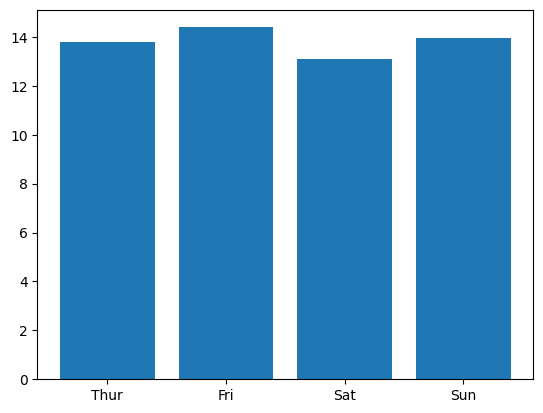

In [11]:

plt.bar(x=procentual_tips_per_day.index, height=procentual_tips_per_day['procentual_tip'])
plt.show()

In [12]:
tips_per_group = tips[['size', 'procentual_tip']].groupby(by="size").mean()
tips_per_group

,procentual_tip
size,
1,17.588776
2,13.976761
3,13.071980
4,12.622108
5,12.153968
6,13.424707


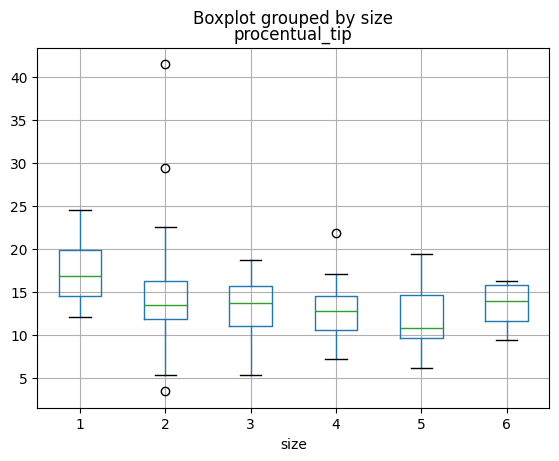

In [13]:
tips.boxplot(by='size', column='procentual_tip')
plt.show()

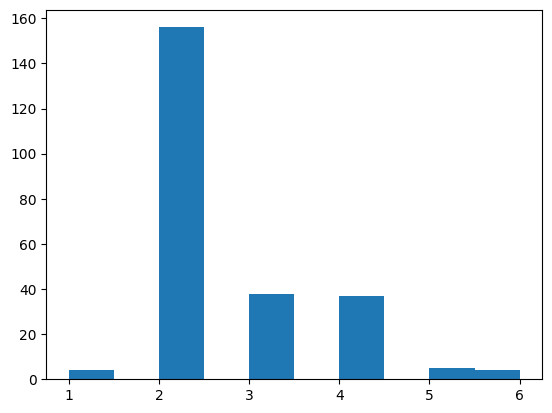

In [14]:
plt.hist(tips['size'])
plt.show()

# Aufgabe 2

In [15]:
df = pd.read_excel('diabetes.xlsx', sheet_name='data',header=0)
df

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [16]:
(df['blood_pressure']==0).sum()

35

In [17]:
imputiertesDf = df.copy()
bmischnitt = round(imputiertesDf[imputiertesDf['bmi'] != 0].mean(),0)
imputiertesDf[imputiertesDf['bmi'] == 0] = bmischnitt

In [18]:
imputiertesDf[df['bmi'] == 0]

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
8,4,121,70,21,81,32.0,0.0,33,0
48,4,121,70,21,81,32.0,0.0,33,0
59,4,121,70,21,81,32.0,0.0,33,0
80,4,121,70,21,81,32.0,0.0,33,0
144,4,121,70,21,81,32.0,0.0,33,0
370,4,121,70,21,81,32.0,0.0,33,0
425,4,121,70,21,81,32.0,0.0,33,0
493,4,121,70,21,81,32.0,0.0,33,0
521,4,121,70,21,81,32.0,0.0,33,0
683,4,121,70,21,81,32.0,0.0,33,0


In [19]:
gttschnitt = imputiertesDf[imputiertesDf['gtt'] != 0].median()
imputiertesDf[imputiertesDf['gtt'] == 0] = gttschnitt
imputiertesDf[df['gtt'] == 0]

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
74,3,118,72,23,44,32.0,0.369,29,0
181,3,118,72,23,44,32.0,0.369,29,0
341,3,118,72,23,44,32.0,0.369,29,0
348,3,118,72,23,44,32.0,0.369,29,0
501,3,118,72,23,44,32.0,0.369,29,0


In [20]:
gttschnitt = round(imputiertesDf[imputiertesDf['blood_pressure'] != 0].mean(),0)
imputiertesDf[imputiertesDf['blood_pressure'] == 0] = gttschnitt
imputiertesDf[df['blood_pressure'] == 0]

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
6,4,122,72,21,84,32.0,0.0,33,0
14,4,122,72,21,84,32.0,0.0,33,0
48,4,121,70,21,81,32.0,0.0,33,0
59,4,121,70,21,81,32.0,0.0,33,0
77,4,122,72,21,84,32.0,0.0,33,0
80,4,121,70,21,81,32.0,0.0,33,0
171,4,122,72,21,84,32.0,0.0,33,0
192,4,122,72,21,84,32.0,0.0,33,0
221,4,122,72,21,84,32.0,0.0,33,0
260,4,122,72,21,84,32.0,0.0,33,0


In [21]:
import sklearn.impute.KNNImputer


ModuleNotFoundError: No module named 'sklearn.impute.KNNImputer'